In [1]:
%matplotlib inline

import numpy as np
import pandas as pd
import datetime as dt

import matplotlib.pyplot as plt

from ram.analysis.run_manager import RunManager
from ram.analysis.run_aggregator import RunAggregator
from ram.analysis.combo_search import CombinationSearch
from ram.analysis.statistics import get_stats, rollup_returns
from ram.utils.time_funcs import convert_date_array

/Users/mitchellsuter/anaconda/envs/python2/lib/python2.7/site-packages/matplotlib/__init__.py:1405: UserWarning: 
This call to matplotlib.use() has no effect because the backend has already
been chosen; matplotlib.use() must be called *before* pylab, matplotlib.pyplot,
or matplotlib.backends is imported for the first time.

  warnings.warn(_use_error_msg)


In [15]:
print(RunManager.get_run_names('StatArbStrategy2'))

        Run     RunDate Completed            Description Starred
0  run_0001  2018-01-08     False     Momentum reversion        
1  run_0002  2018-01-08     False  Returns instead of PL        
2  run_0003  2018-01-08      True                Bug fix        
3  run_0004  2018-01-08      True            Market Rets        
4  run_0005  2018-01-08      True              Sector 25        
5  run_0006  2018-01-08     False              Sector 45        


In [36]:
start_year = 2006
run1 = RunManager('StatArbStrategy2', 'run_0004', test_periods=6, start_year=start_year)
run2 = RunManager('StatArbStrategy2', 'run_0005', test_periods=6, start_year=start_year)
run3 = RunManager('StatArbStrategy2', 'run_0006', test_periods=6, start_year=start_year)
run1.import_return_frame()
run2.import_return_frame()
run3.import_return_frame()

In [37]:
rets1 = (run1.returns.loc[:, '0'] + run1.returns.loc[:, '1']) * -1
rets2 = (run2.returns.loc[:, '0'] + run2.returns.loc[:, '1']) * -1
rets3 = (run3.returns.loc[:, '0'] + run3.returns.loc[:, '1']) * -1

In [38]:
data = pd.DataFrame()
data['Sec20'] = rets1
data['Sec25'] = rets2
data['Sec45'] = rets3
data['Comb'] = (data.Sec20 + data.Sec25  + data.Sec45) / 3.

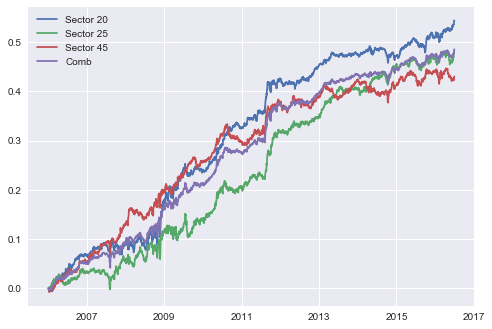

In [39]:
plt.figure()
plt.plot(data.Sec20.cumsum(), label='Sector 20')
plt.plot(data.Sec25.cumsum(), label='Sector 25')
plt.plot(data.Sec45.cumsum(), label='Sector 45')
plt.plot(data.Comb.cumsum(), label='Comb')
plt.legend(loc=2)
plt.show()

In [40]:
get_stats(data.dropna())

,Sec20,Sec25,Sec45,Comb
Total,0.5433,0.4817,0.4301,0.4850
Mean,0.0002,0.0002,0.0002,0.0002
Std,0.0025,0.0024,0.0021,0.0019
Skew,0.8057,0.2676,0.5728,0.9614
Kurt,13.5700,6.5400,4.6900,10.2000
Sharpe,1.2967,1.2154,1.2045,1.5304
Sortino,2.3152,2.1094,2.1907,2.8276
MinRet,-0.0190,-0.0168,-0.0098,-0.0106
WinP,0.5348,0.5420,0.5416,0.5390
DD%,-0.0389,-0.0484,-0.0474,-0.0345


In [41]:
df = rollup_returns(data, 3)
df['Yr'] = df.sum(axis=1)
df

Qtr,1,2,3,4,Yr
Year,,,,,
2006,0.018609,0.006046,0.015453,0.012461,0.052569
2007,0.009761,0.008172,0.001535,0.022741,0.042209
2008,0.007746,-0.007513,0.033088,0.037732,0.071053
2009,0.008942,0.024794,0.007717,0.006862,0.048314
2010,0.016448,0.035620,0.011068,-0.000894,0.062242
2011,0.014786,0.009139,0.039439,0.033779,0.097144
2012,-0.004493,0.007621,-0.000462,0.020026,0.022692
2013,0.020357,0.003891,0.003735,0.009578,0.037560
2014,-0.003120,0.004134,-0.005521,0.017674,0.013167
